In [9]:
import random

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from algorithm import ewm

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
palette = 'deep'
sns.set(font='SimHei', font_scale=1.2, palette=palette)  # 解决Seaborn中文显示问题

# 指标流向桑基图

In [10]:
指标dict = {'对AI的需求程度(Q1)': {'13、您是否有通过人工智能学习工具帮助完成作业的想法？': 0.19105317366172253,
                                   '14、您是否有通过人工智能学习工具帮您完成小测验的想法？': 0.19664015955938982,
                                   '15、您是否有通过人工智能学习工具帮助您完成论文的想法？': 0.19938279938254982,
                                   '17、对于大学生使用人工智能学习工具您是否赞同？': 0.17631193373822923,
                                   '19、您对人工智能学习工具回答问题的可信度持何种态度？': 0.06708662266985567,
                                   '28、您认为以下哪些方面对人工智能学习工具很重要？': 0.1695253109882529},
            '对网络认识的深度(Q2)': {'6、您每周的上网时长大约是多少？': 0.1403419234605448,
                                     '8、您是在什么时间使用学习软件工具呢？': 0.31717770181857213,
                                     '9、您会将自己的资料传到网上和别人进行分享吗？': 0.28769988362344334,
                                     '23、在网络中您主要进行哪些活动？': 0.2547804910974397},
            '倾向于使用软件进行的程度(Q3)': {'7、您是否使用过学习软件工具？': 0.028447728076381462,
                                             '8、您是在什么时间使用学习软件工具呢？': 0.1687554730848213,
                                             '11、您的老师是否推荐过同学们使用过某种学习软件？': 0.23926174103511505,
                                             '19、您对人工智能学习工具回答问题的可信度持何种态度？': 0.07500130854131419,
                                             '26、对于利用学习软件进行学习这种形式，您最关注的是': 0.1950224352439973,
                                             '30、您认为人工智能学习工具融合到哪个学习环节？': 0.2935113140183707},
            '对学习的热爱程度(Q4)': {'9、您会将自己的资料传到网上和别人进行分享吗？': 0.22513523583207265,
                                     '10、您是否想获取全国各高校的学习资源？': 0.0863678144869296,
                                     '12、若有人工智能学习工具，您是否会选择使用？': 0.14794123510520563,
                                     '20、如果您使用人工智能学习工具，更希望得到什么的效果？': 0.16590937138248837,
                                     '25、进入大学后在学习中困扰您的问题是什么？': 0.37464634319330375},
            '对AI的认可程度(Q5)': {'21、您觉得人工智能工具在未来是否可以取代教师？': 0.1331488938110052,
                                   '22、当人工智能工具与教育结合到一定程度时，您觉得学生该如何去适应？': 0.025091356399884576,
                                   '24、您认为学习软件与课堂教学相比较最大的优势是什么？': 0.3259334222504339,
                                   '27、您考虑过使用人工智能工具的哪些安全性？': 0.1977442142638257,
                                   '30、您认为人工智能学习工具融合到哪个学习环节？': 0.3180821132748506}}

In [11]:
nodes = [x for i in map(lambda x: x.keys(), 指标dict.values()) for x in i] + list(指标dict.keys()) + ['总分']
print(nodes, len(nodes))

['13、您是否有通过人工智能学习工具帮助完成作业的想法？', '14、您是否有通过人工智能学习工具帮您完成小测验的想法？', '15、您是否有通过人工智能学习工具帮助您完成论文的想法？', '17、对于大学生使用人工智能学习工具您是否赞同？', '19、您对人工智能学习工具回答问题的可信度持何种态度？', '28、您认为以下哪些方面对人工智能学习工具很重要？', '6、您每周的上网时长大约是多少？', '8、您是在什么时间使用学习软件工具呢？', '9、您会将自己的资料传到网上和别人进行分享吗？', '23、在网络中您主要进行哪些活动？', '7、您是否使用过学习软件工具？', '8、您是在什么时间使用学习软件工具呢？', '11、您的老师是否推荐过同学们使用过某种学习软件？', '19、您对人工智能学习工具回答问题的可信度持何种态度？', '26、对于利用学习软件进行学习这种形式，您最关注的是', '30、您认为人工智能学习工具融合到哪个学习环节？', '9、您会将自己的资料传到网上和别人进行分享吗？', '10、您是否想获取全国各高校的学习资源？', '12、若有人工智能学习工具，您是否会选择使用？', '20、如果您使用人工智能学习工具，更希望得到什么的效果？', '25、进入大学后在学习中困扰您的问题是什么？', '21、您觉得人工智能工具在未来是否可以取代教师？', '22、当人工智能工具与教育结合到一定程度时，您觉得学生该如何去适应？', '24、您认为学习软件与课堂教学相比较最大的优势是什么？', '27、您考虑过使用人工智能工具的哪些安全性？', '30、您认为人工智能学习工具融合到哪个学习环节？', '对AI的需求程度(Q1)', '对网络认识的深度(Q2)', '倾向于使用软件进行的程度(Q3)', '对学习的热爱程度(Q4)', '对AI的认可程度(Q5)', '总分'] 32


In [12]:
link_value = [x for i in map(lambda x: x.values(), 指标dict.values()) for x in i]

link_value += [0.23691834002774398, 0.1265049169251752, 0.19320241159128132, 0.14435884829203316,
               0.29901548316376636]
print(link_value, len(link_value))

[0.19105317366172253, 0.19664015955938982, 0.19938279938254982, 0.17631193373822923, 0.06708662266985567, 0.1695253109882529, 0.1403419234605448, 0.31717770181857213, 0.28769988362344334, 0.2547804910974397, 0.028447728076381462, 0.1687554730848213, 0.23926174103511505, 0.07500130854131419, 0.1950224352439973, 0.2935113140183707, 0.22513523583207265, 0.0863678144869296, 0.14794123510520563, 0.16590937138248837, 0.37464634319330375, 0.1331488938110052, 0.025091356399884576, 0.3259334222504339, 0.1977442142638257, 0.3180821132748506, 0.23691834002774398, 0.1265049169251752, 0.19320241159128132, 0.14435884829203316, 0.29901548316376636] 31


In [13]:
# 定义节点和链接
link_source = []
link_target = []
for k1, v1 in 指标dict.items():
    for k2, v2 in v1.items():
        link_source.append(nodes.index(k2))
        link_target.append(nodes.index(k1))

link_source += [nodes.index(i) for i in 指标dict.keys()]
link_target += [nodes.index('总分')] * len(指标dict)

print(link_source, len(link_source))
print(link_target, len(link_target))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 7, 12, 4, 14, 15, 8, 17, 18, 19, 20, 21, 22, 23, 24, 15, 26, 27, 28, 29, 30] 31
[26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31] 31


In [14]:
import plotly.graph_objects as go

# 创建桑基图
fig = go.Figure(data=[go.Sankey(
    node=dict(
        label=nodes,
        pad=15,
        thickness=20,
    ),
    link=dict(
        source=link_source,
        target=link_target,
        value=link_value,
    )
)])

fig.write_html("桑基图.html")
# 显示图形
fig.show()


# 性别人数占比图

In [15]:
df = pd.read_excel('Q1-5问题topsis和原始问卷汇总结果.xlsx')
df

,序号,1、您的性别(1-22题为单选题),2、您的专业,3、您所在的年级,4、您的性格,5、您最常通过哪种方式上网？,6、您每周的上网时长大约是多少？,7、您是否使用过学习软件工具？,8、您是在什么时间使用学习软件工具呢？,9、您会将自己的资料传到网上和别人进行分享吗？,...,30、您认为人工智能学习工具融合到哪个学习环节？,对AI的需求程度(Q1),对网络认识的深度(Q2),倾向于使用软件进行的程度(Q3),对学习的热爱程度(Q4),对AI的认可程度(Q5),正理想解,负理想解,综合得分指数,排序
0,1,女,文史类,大二,其他,用手机上网,7小时以下,是,平时有时间就使用,完全会,...,教师传授,0.017864,0.013536,0.012230,0.015204,0.008306,0.009970,0.007985,0.444707,3042
1,2,男,理工类,大二,安静型,用手机上网,不上网,否,说不清,完全会,...,教师传授┋课后消化┋评价反馈┋其他,0.008990,0.008978,0.017193,0.018131,0.020671,0.007800,0.010888,0.582629,1639
2,3,女,文史类,大二,温顺型,用手机上网,7小时以下,是,平时有时间就使用,很少会,...,教师传授┋课后消化┋评价反馈,0.019690,0.016314,0.019203,0.017949,0.019630,0.003469,0.013131,0.791026,252
3,4,男,理工类,大二,坚定型,在网吧上,14-20小时,是,平时有时间就使用,完全会,...,教师传授┋课后消化┋评价反馈┋其他,0.011807,0.021088,0.021069,0.022082,0.022921,0.004104,0.014650,0.781177,284
4,5,女,理工类,大一,温顺型,用手机上网,7小时以下,是,平时有时间就使用,很少会,...,教师传授,0.018552,0.014187,0.012711,0.011333,0.011620,0.008933,0.008355,0.483300,2622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4600,4601,男,理工类,大一,安静型,在寝室用笔记本上网,20小时以上,是,说不清,很少会,...,课后消化,0.018552,0.013036,0.009493,0.015656,0.016047,0.007788,0.009655,0.553493,1939
4601,4602,男,理工类,大一,外向型,用手机上网,7-14小时,是,平时有时间就使用,大多数时候会,...,教师传授┋课后消化┋评价反馈┋其他,0.020141,0.018238,0.021545,0.016119,0.021421,0.002893,0.014283,0.831595,139
4602,4603,男,理工类,大一,外向型,在寝室用笔记本上网,7小时以下,是,平时有时间就使用,大多数时候会,...,教师传授┋课后消化┋评价反馈┋其他,0.018370,0.018716,0.021069,0.013827,0.021421,0.003653,0.013639,0.788744,259
4603,4604,男,理工类,大一,安静型,用手机上网,7-14小时,是,说不清,有时会,...,教师传授┋课后消化┋评价反馈┋其他,0.019690,0.010938,0.016330,0.017034,0.022921,0.005157,0.013208,0.719192,566


In [17]:
df.columns

Index(['序号', '1、您的性别(1-22题为单选题)', '2、您的专业', '3、您所在的年级', '4、您的性格',
       '5、您最常通过哪种方式上网？', '6、您每周的上网时长大约是多少？', '7、您是否使用过学习软件工具？',
       '8、您是在什么时间使用学习软件工具呢？', '9、您会将自己的资料传到网上和别人进行分享吗？',
       '10、您是否想获取全国各高校的学习资源？', '11、您的老师是否推荐过同学们使用过某种学习软件？',
       '12、若有人工智能学习工具，您是否会选择使用？', '13、您是否有通过人工智能学习工具帮助完成作业的想法？',
       '14、您是否有通过人工智能学习工具帮您完成小测验的想法？', '15、您是否有通过人工智能学习工具帮助您完成论文的想法？',
       '16、若有人工智能学习工具，影响您使用人工智能学习软件的原因是什么？', '17、对于大学生使用人工智能学习工具您是否赞同？',
       '18、若您使用人工智能学习工具最不希望出现以下哪些事？', '19、您对人工智能学习工具回答问题的可信度持何种态度？',
       '20、如果您使用人工智能学习工具，更希望得到什么的效果？', '21、您觉得人工智能工具在未来是否可以取代教师？',
       '22、当人工智能工具与教育结合到一定程度时，您觉得学生该如何去适应？', '23、在网络中您主要进行哪些活动？',
       '24、您认为学习软件与课堂教学相比较最大的优势是什么？', '25、进入大学后在学习中困扰您的问题是什么？',
       '26、对于利用学习软件进行学习这种形式，您最关注的是', '27、您考虑过使用人工智能工具的哪些安全性？',
       '28、您认为以下哪些方面对人工智能学习工具很重要？', '29、您心目中的人工智能学习工具应该具有以下哪些功能？',
       '30、您认为人工智能学习工具融合到哪个学习环节？', '对AI的需求程度(Q1)', '对网络认识的深度(Q2)',
       '倾向于使用软件进行的程度(Q3)', '对学习的热爱程度(Q4)', '对AI的认可程度(Q5)', '正理想解', '负理想解',
      

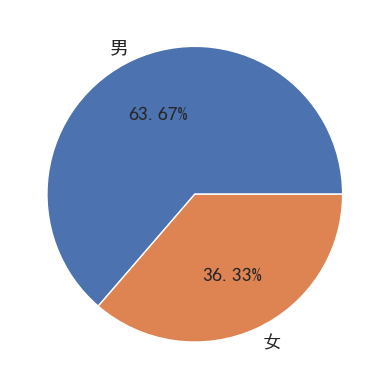

In [27]:
df['1、您的性别(1-22题为单选题)'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.ylabel('')
plt.show()

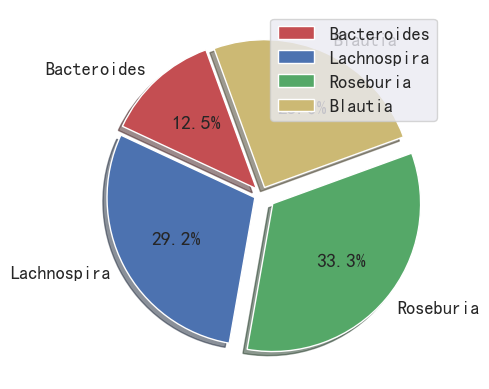

In [33]:
import matplotlib.pyplot as plt

# defining labels
genus = ['Bacteroides', 'Lachnospira', 'Roseburia', 'Blautia']

# portion covered by each label
slices = [3, 7, 8, 6]

# color for each label
colors = ['r', 'b', 'g', 'y']

# plotting the pie chart
plt.pie(slices, labels=genus, colors=colors,
        startangle=110, shadow=True, explode=(0.05, 0.05, 0.1, 0.05),
        radius=1.0, autopct='%1.1f%%')

# plotting legend
plt.legend()

# showing the plot
plt.show()